# Title:DSCI 310 Group Project: Laptop Price Predictor Model

## Summary


Our project aims to answer the question "How can we predict determinants of the laptop market price?". We used publically available [Laptop Dataset(2024)](https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023). 
We performed a robust data analysis in Python, spanning from importing data to sharing insights, prioritizing the creation of workflows that are both replicable and reliable. 
We used the KNN regression method to construct our predictive model. 
Our results are that the price can be predicted by determinaning its (...).

## Introduction

In this digitalized world today, laptops are one of the most demanding digital products. According to Grand View Research, the global laptop market was valued at $194.25 billion in 2022 and is expected to grow in the foreseeable future (Afzal, 2023). This market amount is created by laptops that vary in price on a significant range from less than two hundred to a few thousand dollars. However, the prices of laptops are surely not unpredictable. Here in this project, we answer the question: how can we predict the laptop market price by the appropriate determinants?

This question is important because it helps customers to understand the factors behind the pricing of laptops which helps them to make reasonable decisions while choosing a laptop. Also, the result of this research benefits laptop producers and sellers in price-making strategies. This research lets laptop producers have a better picture of laptops with what types of features should be priced higher on the market. We try to approach this question by fitting a KNN regression model on the dataset “laptop 2024” (Kumar, 2024). The dataset that our research is based on is a public dataset on Kaggle uploaded by Aniket Kumar. It collects data from 991 unique laptops with 22 features. All information is updated to January 14, 2024.

## Methods & Results:

### Data

The data set we choose is a public available Kaggle dataset [Laptop Dataset(2024)](https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023). It has a collection of 991 unique laptops sourced from 'Smartprix' website. Each entry has 22 features including its price, name, brand, processor, RAM, etc. The lastest update of the dataset is on January 14, 2024. 


### Analysis

### Research Project Methodology: Predicting Laptop Prices through Feature Analysis

#### Objective

The aim of this project is to develop a predictive model that can estimate the price of laptops based on various product features. Accurate estimation of the price is crucial for all laptop users, both for the professionals and amators, that are planning to buy new laptops, as well as for the sellers and the laptop mrket industry, as it helps identify potential importance of each of the feature and determine appropriate buying strategies. This model aims to serve various stakeholders in the laptop market, including potential buyers seeking to make informed purchasing decisions, sellers aiming to strategize their pricing, and industry analysts interested in understanding the impact of different laptop features on their market value. The research specifically seeks to identify the determinants of laptop prices, providing insights into which attributes significantly influence cost in the competitive laptop market.

The dataset provided for this project consists of a large number of observations from both a training sample and a test sample. Each observation includes information such as the laptop's brand, model, price, rating, processor details, number of cores and threads, ram memory, primary storage type, capcity and many others. 

#### Dataset Overview

The core of this research is based on a meticulously curated dataset titled ["Laptop Dataset (2024)"]((https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023?resource=download)) downloaded from Kaggle which encompasses a rich collection of 991 unique laptop entries extracted from the Smartprix website. This dataset has been carefully cleaned and updated as of January 14, 2024, ensuring its reliability for in-depth analysis. It features 22 distinct attributes for each laptop, including but not limited to:

- **Brand and Model**: Identifying the manufacturer and specific model of the laptop.
- **Price**: Listed in Indian Rupees, providing a direct measure of market value.
- **Processor Specifications**: Including brand, tier, number of cores, and threads.
- **Memory and Storage**: Details on RAM, primary and secondary storage types and capacities.
- **GPU Details**: Information on the brand and type of graphics processing unit.
- **Display Characteristics**: Screen size, resolution, and touch screen functionality.
- **Operating System**: The installed OS.
- **Warranty**: The duration of the manufacturer's warranty.

#### Methodology

To achieve the project's goal, the methodology will encompass several key stages:

1. Initial steps of data preprocessing will include cleaning the data for inconsistencies, handling missing values, and encoding categorical variables to prepare the dataset for modeling.

2. The stage of explanatory data analysis (EDA) involves examining the dataset to understand the distribution of key features, identify outliers, and uncover potential relationships between variables.

3. Based on insights from EDA, new features may be engineered to better capture the influence of certain attributes on laptop prices. This could include interaction terms or derived features like performance-to-price ratios.

4. A variety of machine learning models, including linear regression, decision trees, and ensemble methods like random forest and gradient boosting, will be evaluated to determine the most effective approach for price prediction. Model selection will be based on cross-validation performance metrics such as R-squared and mean squared error (MSE).

5. The selected model will be rigorously tested using a hold-out test sample to assess its generalization ability and accuracy in predicting laptop prices. 

6. Once the model is finalized, an analysis of feature importance will be conducted to identify which laptop characteristics are most predictive of price. This will address the research question by highlighting the key determinants of laptop pricing.

#### Expected Outcomes

The culmination of this research project is anticipated to yield a robust model that can predict laptop prices with high accuracy, offering valuable insights into the factors that most significantly impact laptop market values. Through this analysis, stakeholders in the laptop industry will be better equipped to understand pricing dynamics, facilitating more informed decision-making processes for both consumers and sellers. Additionally, the project aims to contribute to the academic and practical understanding of price determination in technology markets, potentially guiding future research and development strategies within the laptop industry.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

# Load data

In [2]:
import os
import pandas as pd

# Specify the path to the DATA folder
data_folder = 'DATA'

# Get the list of files in the DATA folder
file_list = os.listdir(data_folder)

# Read each file and store the data in a dictionary
data_dict = {}
for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    if os.path.isfile(file_path):
        data_dict[file_name] = pd.read_csv(file_path)  # Assuming the files are in CSV format

# Visualize the main information from each file
for file_name, data_frame in data_dict.items():
    print(f"File: {file_name}")
    display(data_frame.head())  # Display the first few rows of each data frame
    print()

df = data_frame

File: laptops.csv


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


# Explanatory data analysis

The dataset, titled "Laptop Dataset (2024)," encompasses a meticulously curated collection of 991 unique laptop entries, sourced from the Smartprix website. It has been updated as of January 14, 2024, and provides a comprehensive overview of various laptop features, making it an invaluable resource for developing price prediction models and recommendation systems. This dataset includes a wide array of attributes for each laptop, offering insights into the intricate dynamics of laptop pricing and consumer preferences. The features captured in the dataset are as follows:

- `Brand`: The name of the laptop brand.
- `Model`: The specific model or series of the laptop.
- `Price`: The price of the laptop in Indian rupees.
- `Rating`: The rating assigned to each laptop based on its specifications.
- `Processor_brand`: The brand of the processor used in the laptop.
- `Processor_tier`: The performance tier or category of the processor.
- `Number_of_Cores`: The number of processing cores in the processor.
- `Number_of_Threads`: The number of threads supported by the processor.
- `Ram_memory`: The amount of RAM used in the laptop.
- `Primary_storage_type`: The type of primary storage (e.g., HDD, SSD).
- `Primary_storage_capacity`: The capacity of the primary storage in the laptop.
- `Secondary_storage_type`: The type of secondary storage, if available.
- `Secondary_storage_capacity`: The capacity of the secondary storage in the laptop.
- `GPU_brand`: The brand of the graphics processing unit (GPU).
- `GPU_type`: The type of the GPU.
- `Is_Touch_screen`: Indicates whether the laptop has a touch screen feature.
- `Display_size`: The size of the laptop display in inches.
- `Resolution_width`: The width resolution of the display.
- `Resolution_height`: The height resolution of the display.
- `OS`: The operating system installed on the laptop.
- `Year_of_warranty`: The duration of the warranty provided for the laptop, usually in years.

This dataset serves as a solid foundation for exploring laptop pricing dynamics and consumer preferences, equipped with a rich set of features for in-depth analysis. It consists of a total of 991 observations, each detailing a unique laptop configuration to assist in the development of accurate price prediction models and effective recommendation systems.

## Data Exploration and Preprocessing

#### 1. Investigate `Price` Value Distribution

To investigate the distribution of the `Price` value within the "Laptop Dataset (2024)," we will analyze the frequency and spread of different laptop price values in the dataset. This step is crucial for understanding the range and variability of laptop prices, which will provide valuable insights into the dataset's composition and potential patterns. By examining how frequently each price point occurs, we can start to uncover the underlying distribution of laptop prices in the market. This analysis is instrumental in identifying trends and outliers, aiding in the development of robust price prediction models and effective recommendation systems.

In [3]:
df['Price'].value_counts()

Price
46990     12
39990     12
34990     12
49990     12
44990     11
          ..
63999      1
12990      1
342500     1
51487      1
75500      1
Name: count, Length: 545, dtype: int64

In [4]:
exchange_rate = 0.012  # Current exchange rate from Indian Rupee to USD

# Add a new column to the DataFrame for the price in USD
df['Price_USD'] = df['Price'] * exchange_rate

# To see the first few rows and verify the new column
print(df.head())

   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... secondary_storage_capacity  gpu_brand    gp

In [5]:
# Delete the original 'Price' column
df.drop('Price', axis=1, inplace=True)

# Rename 'Price_USD' column to 'Price'
df.rename(columns={'Price_USD': 'Price'}, inplace=True)

# Display the first few rows to verify the changes
print(df.head())

   index   brand                                              Model  Rating  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...      63   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...      67   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...      73   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...      62   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...      62   

  processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0           intel        core i3          2            4           8   
1           intel        core i7          4            8          16   
2             amd        ryzen 5          6           12           8   
3           intel        core i5         12           16           8   
4             amd        ryzen 3          4            8           8   

  primary_storage_type  ...  secondary_storage_capacity gpu_brand    gpu_type  \
0          

In [6]:
df.head()

,index,brand,Model,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,Price
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,63,intel,core i3,2,4,8,SSD,...,0,intel,integrated,False,15.6,1920,1080,windows,1,287.88
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,67,intel,core i7,4,8,16,SSD,...,0,intel,integrated,False,15.6,1920,1080,windows,1,431.88
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,73,amd,ryzen 5,6,12,8,SSD,...,0,amd,dedicated,False,15.6,1920,1080,windows,1,613.20
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,62,intel,core i5,12,16,8,SSD,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,62,amd,ryzen 3,4,8,8,SSD,...,0,amd,integrated,False,15.6,1920,1080,windows,1,342.96


In [14]:
import altair as alt

df['Price'] = df['Price'].astype(int)

# Create a histogram of laptop prices
chart = alt.Chart(df).mark_bar(
    color='#7ca0ff',  # Bar color
    opacity=0.7       # Bar opacity
).encode(
    x=alt.X('Price:Q', bin=alt.Bin(maxbins=40), title='Price (USD)'),
    y=alt.Y('count()', title='Frequency'),
    tooltip=[alt.Tooltip('count()', title='Frequency'), alt.Tooltip('Price:Q', title='Price Range')]
).properties(
    title='Distribution of Laptop Prices',
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

/bin/bash: -c: line 0: syntax error near unexpected token `Visualisations/Graph1.png'
/bin/bash: -c: line 0: `[Graph1](Visualisations/Graph1.png)'


![Graph1](Visualisations/Graph1.png)

### Key Takeaway

The key takeaway from analyzing the distribution of laptop prices is that there is a clear skew towards lower-priced models. The majority of laptops are clustered in the lower price range, with a significant drop in frequency as prices increase. This suggests that more affordable laptops are far more common, or at least more commonly listed on the Smartprix website from which this data was sourced.

The prevalence of lower-priced laptops could indicate a stronger market demand in this price segment, possibly reflecting the purchasing power of the consumer base or the competitive pricing strategies of manufacturers. For predictive modeling, this skewness towards lower prices could influence the model's accuracy, potentially leading it to be more reliable at predicting prices for lower-priced laptops than for higher-priced ones.

Additionally, the tapering off of frequency at higher price points may point to a smaller niche market for premium laptops. For businesses and retailers, this distribution could inform inventory and marketing strategies, emphasizing the broad appeal of budget-friendly options. In the context of price prediction, care must be taken to ensure that the model does not undervalue the unique features and qualities that might justify the higher prices of less common, premium models.

In [15]:
# Perform descriptive analysis on 'Price' column of the df DataFrame
descriptive_stats = df['Price'].describe()

# Print the descriptive statistics
print(descriptive_stats)

count     991.000000
mean      926.454087
std       688.620895
min       117.000000
25%       523.000000
50%       742.000000
75%      1070.500000
max      5453.000000
Name: Price, dtype: float64


The output of the descriptive analysis on the `Price` column provides valuable insights into the distribution and characteristics of laptop prices in USD in the dataset:

- **Count**: The count indicates the number of non-missing values in the `Price` column, which is 991. This suggests that the dataset is complete with no missing values for the price in USD.

- **Mean**: The mean value of 926.45 USD represents the average price of laptops. This provides an estimate of the central tendency of the price distribution, indicating that, on average, laptops in the dataset are priced around this value.

- **Standard Deviation**: The standard deviation of 688.62 USD quantifies the spread or dispersion of the laptop prices around the mean. A larger standard deviation suggests greater variability in the prices, indicating a wide range of prices within the dataset.

- **Minimum and Maximum**: The minimum price value of 117 USD represents the least expensive laptop in the dataset, while the maximum price value of 5,453 USD represents the most expensive laptop. These values highlight the extent of the price range covered in the dataset.

- **Quartiles**: The 25th percentile (Q1) of 523 USD and the 75th percentile (Q3) of 1,070.50 USD provide additional reference points for understanding the distribution of prices. Specifically, 25% of laptops are priced at or below 523 USD, and 75% are priced at or below 1,070.50 USD. The median (50th percentile) price of 742 USD indicates that half of the laptops are priced below this amount.

This descriptive analysis helps us understand the pricing structure within the dataset, which can be instrumental for both consumers looking to purchase laptops within certain price ranges and sellers aiming to price their laptops competitively in the market.

## 2. Investigate Data Types

In [16]:
print(df.dtypes)

index                           int64
brand                          object
Model                          object
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
Price                           int64
dtype: object


### Key Takeaway

The key takeaway from the data types analysis of the `laptops.csv` dataset is the presence of a diverse range of data types, which suggests a mixture of numerical, categorical, and boolean data within the features. Specifically, columns such as `brand`, `Model`, `processor_brand`, `processor_tier`, `gpu_brand`, `gpu_type`, `OS`, and `year_of_warranty` are of object type, likely indicating categorical data. 

Numerical columns like `Rating`, `num_cores`, `num_threads`, `ram_memory`, `primary_storage_capacity`, `secondary_storage_capacity`, `display_size`, `resolution_width`, `resolution_height`, and the target variable `Price` are either of type int64 or float64, representing quantitative data that can be used directly in mathematical computations and statistical analyses.

The boolean column `is_touch_screen` indicates binary data, which can be easily encoded as 0s and 1s for modeling purposes. 

## 3. Investigate possible invalid data

In [17]:
import pandas as pd

# Set the pandas option to display floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Perform descriptive analysis on the entire DataFrame
df_describe = df.describe()

# Print the descriptive statistics for the entire DataFrame
print(df_describe)

        index  Rating  num_cores  num_threads  ram_memory  \
count  991.00  991.00     991.00       991.00      991.00   
mean   505.86   63.93       8.13        12.19       13.05   
std    287.90   10.19       4.22         5.59        5.59   
min      1.00   24.00       2.00         0.00        2.00   
25%    258.50   58.00       6.00         8.00        8.00   
50%    507.00   64.00       8.00        12.00       16.00   
75%    754.50   71.00      10.00        16.00       16.00   
max   1002.00   89.00      24.00        32.00       36.00   

       primary_storage_capacity  secondary_storage_capacity  display_size  \
count                    991.00                      991.00        991.00   
mean                     610.94                        4.00         15.17   
std                      266.93                       33.55          0.94   
min                       32.00                        0.00         10.10   
25%                      512.00                        0.00      

The descriptive analysis of the laptop dataset provides insightful information regarding the specifications and price points of laptops:

- **Rating**: With a mean rating of 63.93 and a standard deviation of 10.19, the laptops in the dataset have a moderate average rating, with a typical range between 53.74 (mean - std) and 74.12 (mean + std). The ratings span from a low of 24 to a high of 89, indicating a wide range of customer satisfaction.

- **Processor Cores and Threads**: The average number of processor cores is 8.13 with a standard deviation of 4.22, suggesting a mix of laptops from standard dual-core to high-performance multi-core systems. Similarly, the number of threads averages at 12.19, ranging widely as indicated by the standard deviation of 5.59, showing that laptops with various multitasking capabilities are represented.

- **RAM Memory**: On average, laptops come with 13.05 GB of RAM, and the standard deviation of 5.59 GB indicates a broad selection from basic to high-end memory configurations.

- **Storage Capacity**: The primary storage capacity averages 610.94 GB, with a large number of laptops having 512 GB, as seen in the 25th, 50th, and 75th percentiles. The secondary storage is not common, with an average close to zero and a maximum of 512 GB.

- **Display Size**: Laptops have an average screen size of 15.17 inches, with a relatively small standard deviation of 0.94 inches, suggesting most laptops fall within the standard size range for consumer notebooks.

- **Resolution**: The average resolution width is 2003.5 pixels with a notable standard deviation of 361.97 pixels, indicating a variety of display resolutions, with the most common being 1920 pixels wide. The average resolution height is 1181.23 pixels, with 1080 pixels being the typical height, suggesting that many laptops in the dataset likely have Full HD displays.

- **Price**: The average price of a laptop is \$926.45 USD, with a wide range in prices as demonstrated by the standard deviation of \$688.62 USD. The prices range from as low as \$117 USD to as high as \$5453 USD, indicating a dataset that includes both budget-friendly options and premium models.

This data suggests a diverse range of laptops catering to various needs and budgets, from basic models suitable for everyday tasks to high-end laptops with advanced features. For predictive modeling and market analysis, this variance in features and prices will need to be considered, as it affects both consumer choice and pricing strategies.

In [22]:
df.sum()

index                                                                    501308
brand                         tecnotecnohpacerlenovoappleinfinixasushpinfini...
Model                         Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
Rating                                                                    63356
processor_brand               intelintelamdintelamdappleintelintelintelintel...
processor_tier                core i3core i7ryzen 5core i5ryzen 3m1core i5co...
num_cores                                                                  8055
num_threads                                                               12082
ram_memory                                                                12930
primary_storage_type          SSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDS...
primary_storage_capacity                                                 605440
secondary_storage_type        No secondary storageNo secondary storageNo sec...
secondary_storage_capacity              

## 4. Distribution analysis

In [21]:
df.head()

,index,brand,Model,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,Price
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,63,intel,core i3,2,4,8,SSD,...,0,intel,integrated,False,15.60,1920,1080,windows,1,287
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,67,intel,core i7,4,8,16,SSD,...,0,intel,integrated,False,15.60,1920,1080,windows,1,431
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,73,amd,ryzen 5,6,12,8,SSD,...,0,amd,dedicated,False,15.60,1920,1080,windows,1,613
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,62,intel,core i5,12,16,8,SSD,...,0,intel,integrated,False,14.00,1920,1080,windows,1,479
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,62,amd,ryzen 3,4,8,8,SSD,...,0,amd,integrated,False,15.60,1920,1080,windows,1,342


In [23]:
import altair as alt

# Create a list of columns for which we want to create histograms
columns = ['Rating', 'num_cores', 'num_threads', 'ram_memory', 
           'primary_storage_capacity', 'secondary_storage_capacity', 
           'display_size', 'resolution_width', 'resolution_height', 'Price']

# Create a chart for each column and store them in a list
charts = [
    alt.Chart(df).mark_bar().encode(
        x=alt.X(f'{col}:Q', bin=True),  # Q for quantitative data
        y=alt.Y('count()', title='Frequency'),
        tooltip=[alt.Tooltip(f'{col}:Q', title=col)]
    ).properties(
        title=f'Distribution of {col}',
        width=200,
        height=150
    )
    for col in columns
]

# Combine charts into a grid layout
chart_grid = alt.vconcat(*[
    alt.hconcat(*charts[i:i+3])  # 3 charts per row
    for i in range(0, len(charts), 3)
])

# Display the grid
chart_grid

alt.VConcatChart(...)

![Graph1](Visualisations/Graph2.png)

In [67]:
import altair as alt

# Map columns to units for those that are quantitative
units_mapping = {
    'brand': '',
    'Model': '',
    'Rating': 'Stars',
    'processor_brand': '',
    'processor_tier': '',
    'num_cores': 'Cores',
    'num_threads': 'Threads',
    'ram_memory': 'GB',
    'primary_storage_type': '',
    'primary_storage_capacity': 'GB',
    'secondary_storage_type': '',
    'secondary_storage_capacity': 'GB',
    'gpu_brand': '',
    'gpu_type': '',
    'is_touch_screen': '',
    'display_size': 'Inches',
    'resolution_width': 'Pixels',
    'resolution_height': 'Pixels',
    'OS': '',
    'year_of_warranty': 'Years',
    'Price': 'USD'
}

# Columns of interest
columns = list(units_mapping.keys())

# Define a color-blind-friendly "rainbow" palette
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#999999']
# Ensure we have enough colors
colors *= (len(columns) // len(colors) + 1)

# Create charts
charts = []
for i, col in enumerate(columns):
    title = f'{col} ({units_mapping[col]})'  # Include units in title
    chart = alt.Chart(df).mark_bar(color=colors[i]).encode(
        x=alt.X(f'{col}:Q', bin=True, title=title),
        y=alt.Y('count()', title='Frequency'),
        tooltip=[alt.Tooltip(f'{col}:Q', title=col)]
    ).properties(
        width=180,
        height=140
    )
    charts.append(chart)

# Combine charts into a grid layout without explicit titles
chart_grid = alt.vconcat(*[
    alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)
]).configure_axis(
    titleFontSize=12,
    labelFontSize=10
)

chart_grid

alt.VConcatChart(...)

![Graph1](Visualisations/Graph3.png)

## 5. Handle missing values

In [42]:
# Calculate column sums of missing values
missing_sums = df.isna().sum()

# Sort the sums in ascending order
sorted_missing_sums = missing_sums.sort_values()

print(sorted_missing_sums)

index                         0
OS                            0
resolution_height             0
resolution_width              0
display_size                  0
is_touch_screen               0
gpu_type                      0
gpu_brand                     0
secondary_storage_capacity    0
secondary_storage_type        0
primary_storage_capacity      0
primary_storage_type          0
ram_memory                    0
num_threads                   0
num_cores                     0
processor_tier                0
processor_brand               0
Rating                        0
Model                         0
brand                         0
year_of_warranty              0
Price                         0
dtype: int64


Luckily, there are no missing values in our data!

## 6. Outliers

In [47]:
df = df.drop(columns=['index'])

In [48]:
column_names = df.columns
print(column_names)

Index(['brand', 'Model', 'Rating', 'processor_brand', 'processor_tier',
       'num_cores', 'num_threads', 'ram_memory', 'primary_storage_type',
       'primary_storage_capacity', 'secondary_storage_type',
       'secondary_storage_capacity', 'gpu_brand', 'gpu_type',
       'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty', 'Price'],
      dtype='object')


In [52]:
df.sum()

brand                         tecnotecnohpacerlenovoappleinfinixasushpinfini...
Model                         Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
Rating                                                                    63356
processor_brand               intelintelamdintelamdappleintelintelintelintel...
processor_tier                core i3core i7ryzen 5core i5ryzen 3m1core i5co...
num_cores                                                                  8055
num_threads                                                               12082
ram_memory                                                                12930
primary_storage_type          SSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDSSDS...
primary_storage_capacity                                                 605440
secondary_storage_type        No secondary storageNo secondary storageNo sec...
secondary_storage_capacity                                                 3968
gpu_brand                     intelintel

In [54]:
import pandas as pd

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]

        # Print or visualize the outliers
        print(f"Outliers in column '{column_name}':\n{outliers}\n")
    else:
        print(f"Skipping non-numeric column '{column_name}'\n")

Skipping non-numeric column 'brand'

Skipping non-numeric column 'Model'

Outliers in column 'Rating':
70     26
169    35
192    24
325    37
365    38
372    31
389    38
392    38
414    38
486    37
488    37
491    37
634    38
636    38
640    37
728    38
730    37
953    37
990    37
Name: Rating, dtype: int64

Skipping non-numeric column 'processor_brand'

Skipping non-numeric column 'processor_tier'

Outliers in column 'num_cores':
15     20
47     24
139    24
172    24
191    20
224    24
225    24
292    24
340    24
369    24
380    24
399    24
404    24
559    24
570    24
583    24
603    24
608    24
787    24
885    24
928    24
929    24
976    24
Name: num_cores, dtype: int64

Outliers in column 'num_threads':
47     32
139    32
172    32
224    32
225    32
292    32
340    32
369    32
380    32
399    32
404    32
559    32
570    32
583    32
603    32
608    32
787    32
928    32
929    32
976    32
Name: num_threads, dtype: int64

Outliers in column 'ram_me

In [56]:
import pandas as pd

# Create an empty list to store outlier information
outlier_info = []

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        
        # Append the outlier information to the list
        outlier_info.append({'Column': column_name, 'Outliers': outliers.tolist()})
    else:
        outlier_info.append({'Column': column_name, 'Outliers': 'Non-numeric data'})

# Create a DataFrame from the list
outlier_df = pd.DataFrame(outlier_info)

# Display the outlier information table
print(outlier_df)

                        Column  \
0                        brand   
1                        Model   
2                       Rating   
3              processor_brand   
4               processor_tier   
5                    num_cores   
6                  num_threads   
7                   ram_memory   
8         primary_storage_type   
9     primary_storage_capacity   
10      secondary_storage_type   
11  secondary_storage_capacity   
12                   gpu_brand   
13                    gpu_type   
14             is_touch_screen   
15                display_size   
16            resolution_width   
17           resolution_height   
18                          OS   
19            year_of_warranty   
20                       Price   

                                             Outliers  
0                                    Non-numeric data  
1                                    Non-numeric data  
2   [26, 35, 24, 37, 38, 31, 38, 38, 38, 37, 37, 3...  
3                          

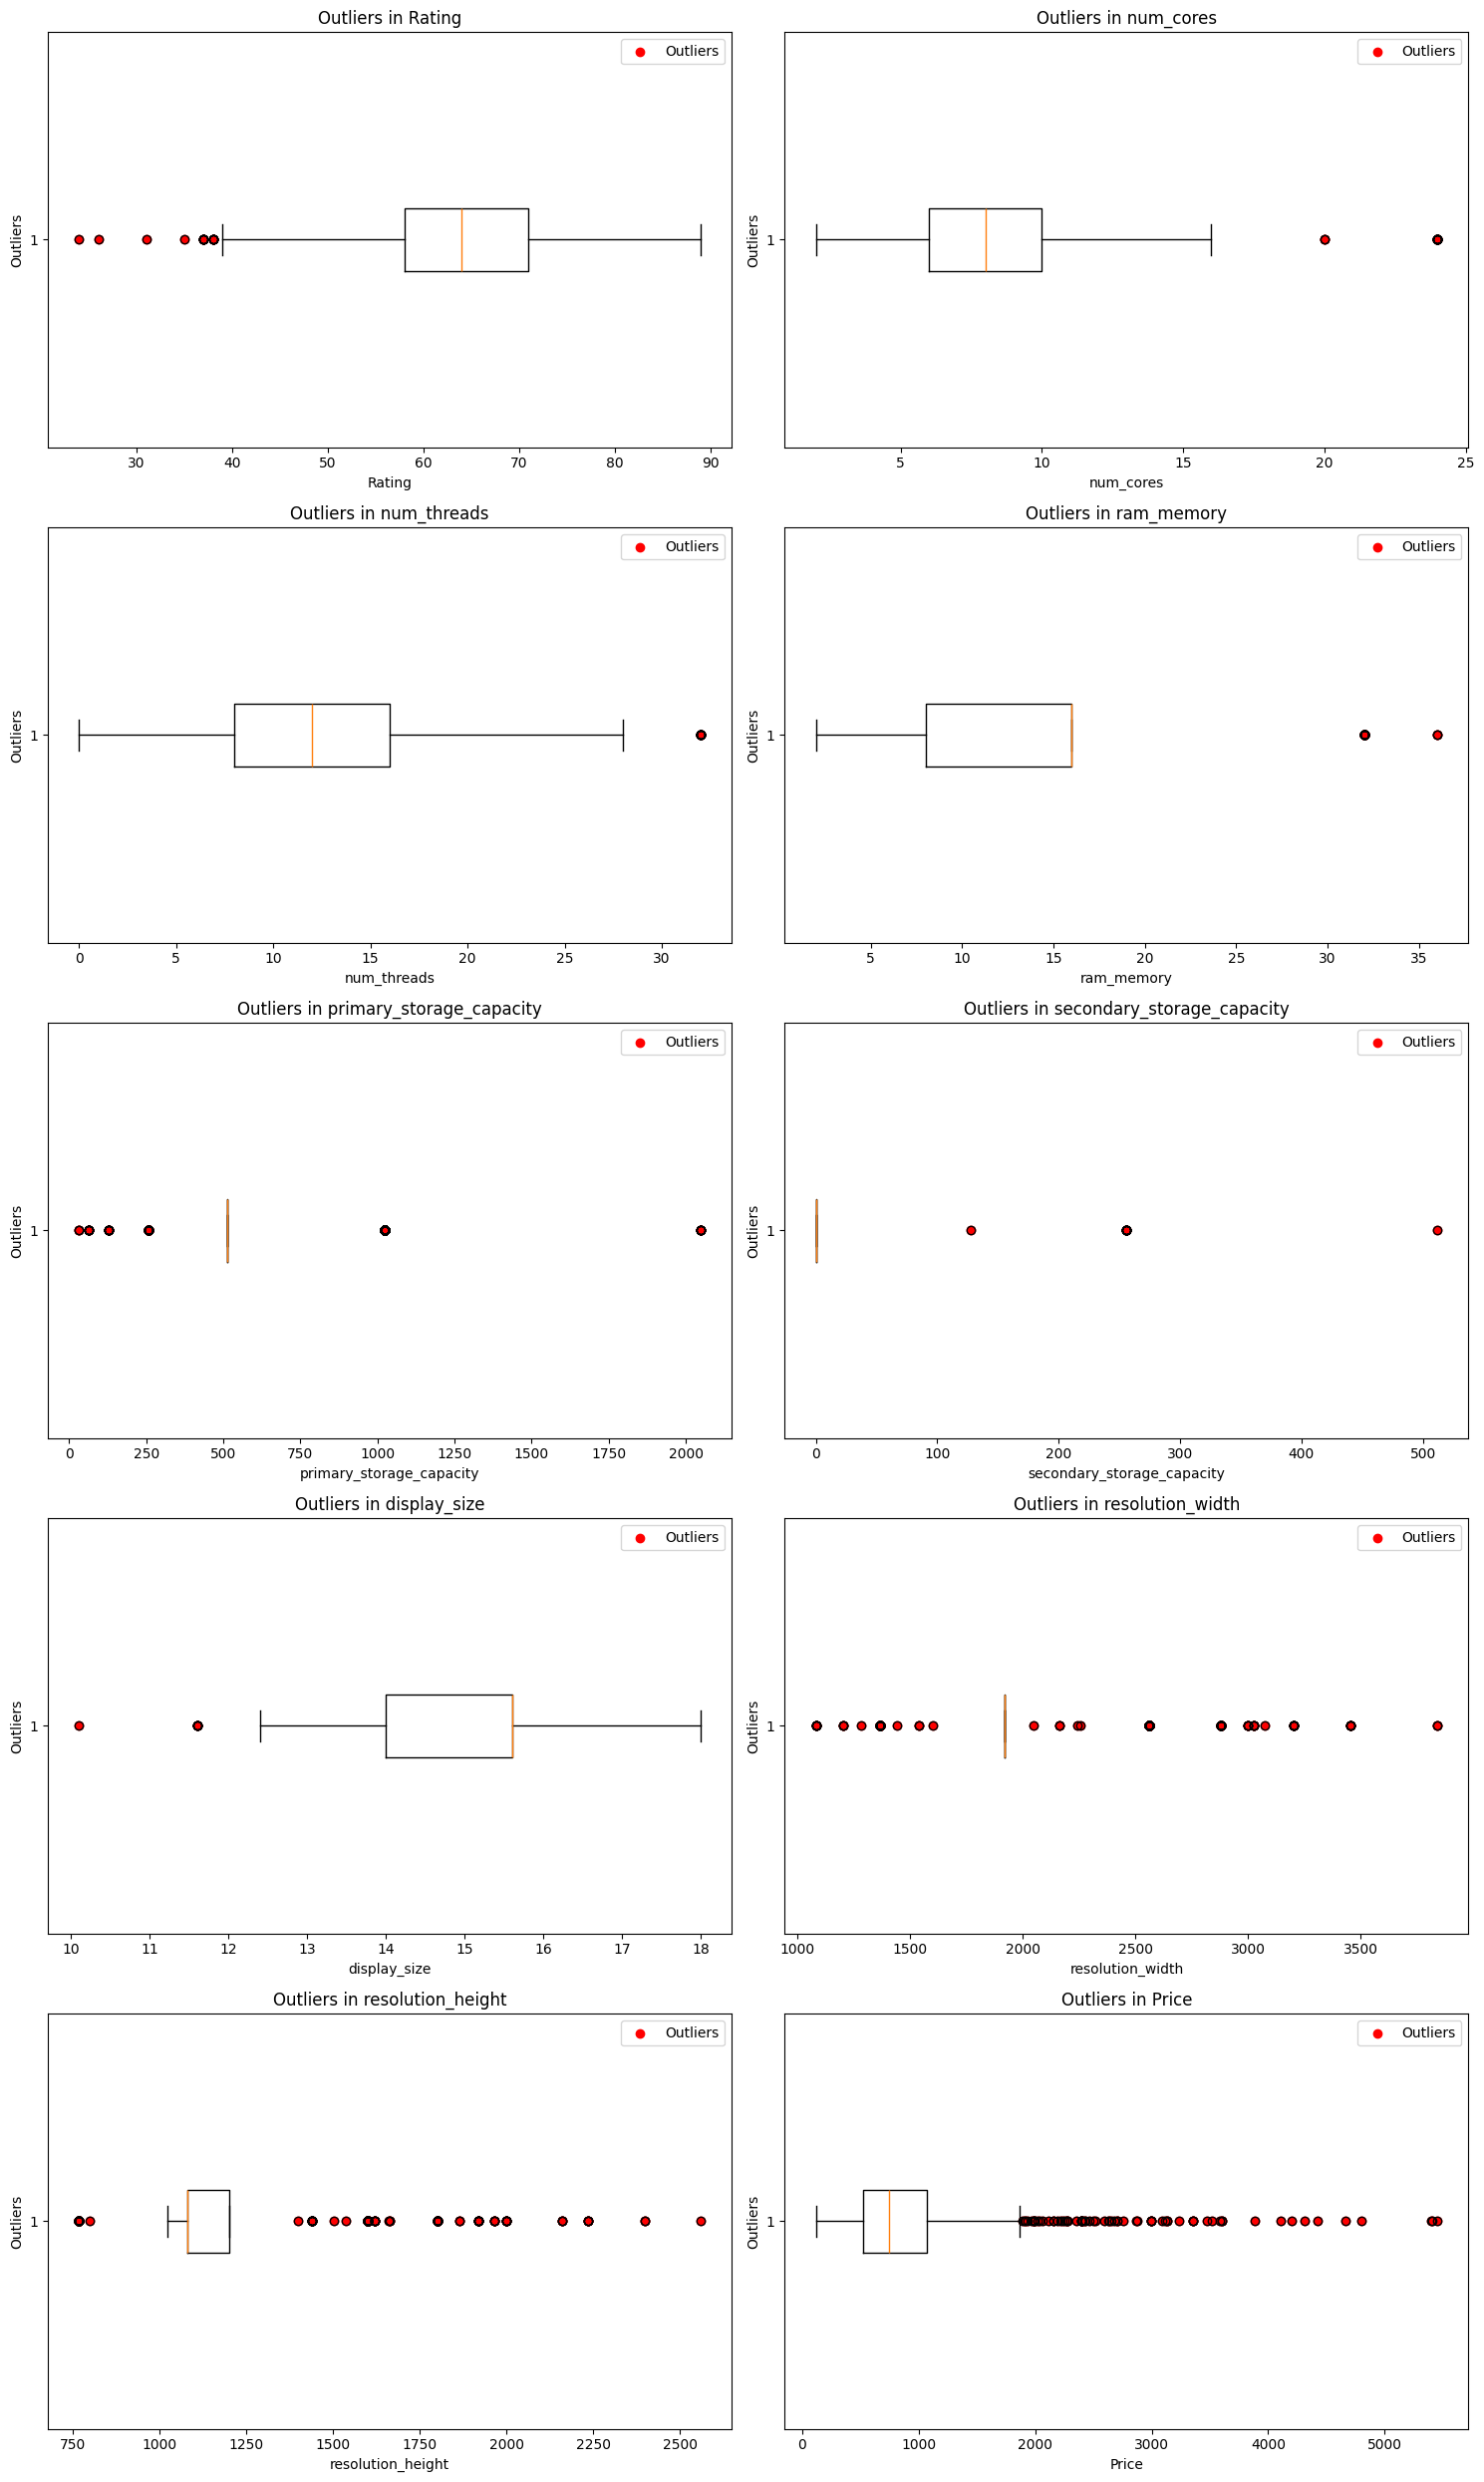

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to store outlier data for each column
outliers_data = []

# Iterate over each column
for column_name in df.columns:
    data_column = df[column_name]
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(data_column) and not pd.api.types.is_bool_dtype(data_column):
        # Calculate the interquartile range (IQR)
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        
        # Store outlier data
        outliers_data.append((column_name, data_column, outliers))

# Calculate the number of rows and columns needed for the grid
num_plots = len(outliers_data)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a figure and axis object
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over each column data
for i, (column_name, data_column, outliers) in enumerate(outliers_data):
    # Plot the outliers
    axs[i].boxplot(data_column, vert=False)
    axs[i].scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
    axs[i].set_title(f'Outliers in {column_name}')
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel('Outliers')
    axs[i].legend()

# Hide empty subplots
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

## 7. Correlation analysis

In [66]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Find correlation with the target and sort
correlations = df[numeric_columns].corr()['Price'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 secondary_storage_capacity   -0.01
display_size                  0.21
resolution_height             0.62
ram_memory                    0.63
primary_storage_capacity      0.64
resolution_width              0.64
Rating                        0.66
num_threads                   0.72
num_cores                     0.72
Price                         1.00
Name: Price, dtype: float64

Most Negative Correlations:
 secondary_storage_capacity   -0.01
display_size                  0.21
resolution_height             0.62
ram_memory                    0.63
primary_storage_capacity      0.64
resolution_width              0.64
Rating                        0.66
num_threads                   0.72
num_cores                     0.72
Price                         1.00
Name: Price, dtype: float64


<Axes: >

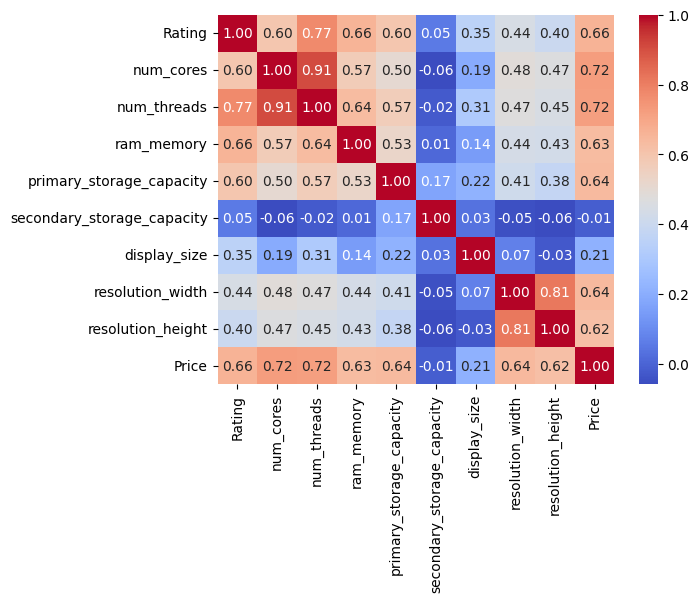

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

# Check if variable is numeric and select those which are
numeric_vars = df.select_dtypes(include=np.number).columns.tolist()

# Compute correlations
correlations = df[numeric_vars].corr()

# Plot correlation matrix
sns.heatmap(correlations.loc[numeric_vars, numeric_vars],
            annot=True, cmap="coolwarm", fmt=".2f")

Positive correlations (strongest at the bottom):

- **secondary_storage_capacity**: The secondary storage capacity has a weak positive correlation with the price.

- **display_size**: The display size has a moderate positive correlation with the price.

- **resolution_height**: The resolution height has a strong positive correlation with the price.

- **ram_memory**: The RAM memory has a strong positive correlation with the price.

- **primary_storage_capacity**: The primary storage capacity has a strong positive correlation with the price.

- **resolution_width**: The resolution width has a strong positive correlation with the price.

- **Rating**: The rating has a strong positive correlation with the price.

- **num_threads**: The number of threads has a strong positive correlation with the price.

- **num_cores**: The number of cores has a strong positive correlation with the price.

- **Price**: The price has a perfect positive correlation with itself.


Negative correlations (weakest at the top):

- **secondary_storage_capacity**: The secondary storage capacity has a weak negative correlation with the price.

- **display_size**: The display size has a moderate negative correlation with the price.

- **resolution_height**: The resolution height has a strong negative correlation with the price.

- **ram_memory**: The RAM memory has a strong negative correlation with the price.

- **primary_storage_capacity**: The primary storage capacity has a strong negative correlation with the price.

- **resolution_width**: The resolution width has a strong negative correlation with the price.

- **Rating**: The rating has a strong negative correlation with the price.

- **num_threads**: The number of threads has a strong negative correlation with the price.

- **num_cores**: The number of cores has a strong negative correlation with the price.

- **Price**: The price has a perfect negative correlation with itself.

## Feature engineering

## Discussion:

### summarize findings


### Impacts

Given the findings of this research, the impact exists in many aspects. Firstly, by the model provided by this research, the price of a laptop can be predicted by some basic information about it. This can be helpful to customers as they can better about understand how much the laptop they intended to buy is actually worth and therefore make the best decision. Laptop companies as well can use this information while they are setting prices for their laptop products to maximize the market. Besides that, Insights from our predictive model can guide product design by highlighting which features contribute most significantly to perceived value and price. It could help laptop companies make design decisions in the future to design more profitable products. In addition, the result also could help in identifying the trend in the current laptop market. Such as which feature is more popular this year. And this is probably the feature which customers would pay more money on. 

### further studies

Our study showed some promising results that can help both consumers and producers of the laptop market but there is still room for improvement. Four major studies can be conducted based on our results. Firstly, we could try to answer the question: "How has the importance of specific features in determining laptop prices changed over time?" This analysis could reveal shifting technology trends and consumer preferences, providing foresight into future market developments. Secondly, we could look into region market differences which explore feature importance differences in regions. Exploring this could uncover opportunities for localized marketing strategies or product customization to meet regional demands. Thirdly, we could focus on the impact of brand reputation by trying to answer the question: "How does a brand's reputation or perceived quality affect laptop prices?" Further research could quantify the brand effect and its interaction with product features in price setting. Last but not least we could implement different models as we only tried the KNN model here. We could try more advanced predictive models in machine learning algorithms in the future to increase our accuracy and overall performance.

## References:

Afzal, M. (2023, December 9). 15 best selling laptops in 2023. Yahoo! Finance. https://finance.yahoo.com/news/15-best-selling-laptops-2023-182017276.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAADuqlSTbXMvnb1xhpvBsZ7W54qxGIf1JJ4TNTahMyewE-L9ZpqDiXgQVu1KGLwbA05RzhoL7kfU6WfRpfZUs3z2OYltBznbqwsn6jgoy6LUGJa9Z6TaugOmFPwr9ml_UlcH3tKS7xiJ1O_kLvAqFV7rcsdwOHQy0xv_jg4QACxHQ

Kumar, A. (2024, February 10). Laptop dataset (2024). Kaggle. https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023 